## Assignment 2

<br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load the dataset

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Visualisations

#### Univariate Analysis

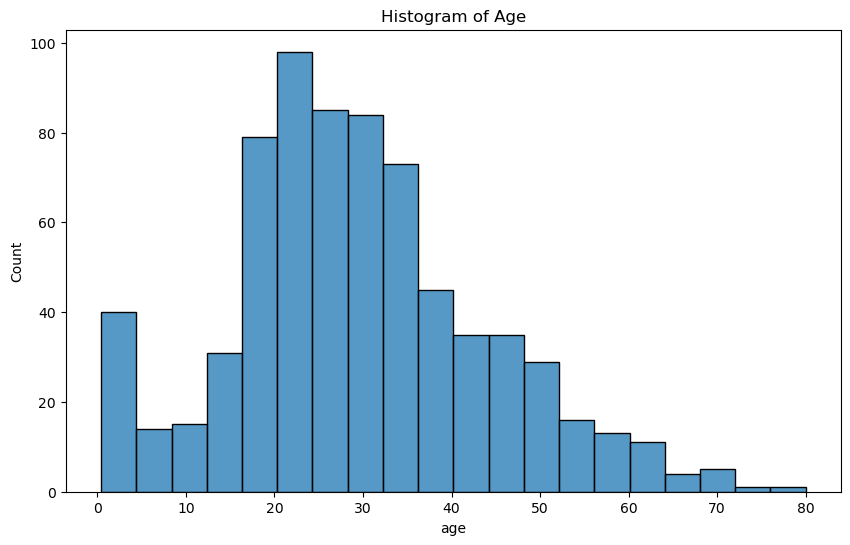

In [4]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20)
plt.title('Histogram of Age')
plt.show()

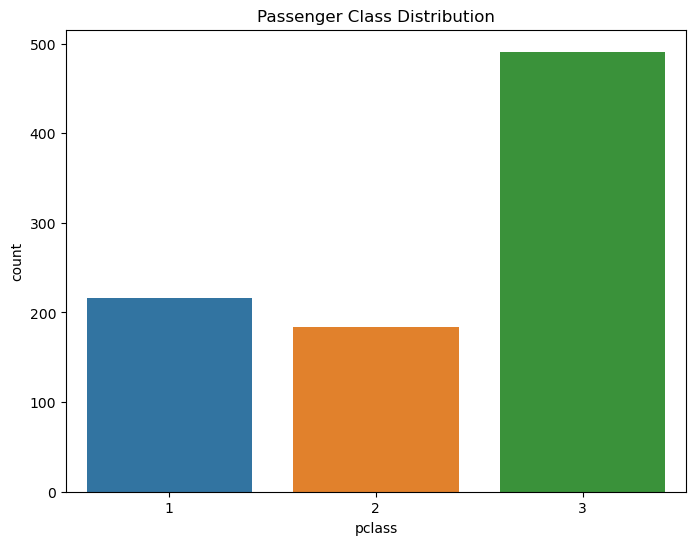

In [5]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='pclass')
plt.title('Passenger Class Distribution')
plt.show()

#### Bivariate Analysis

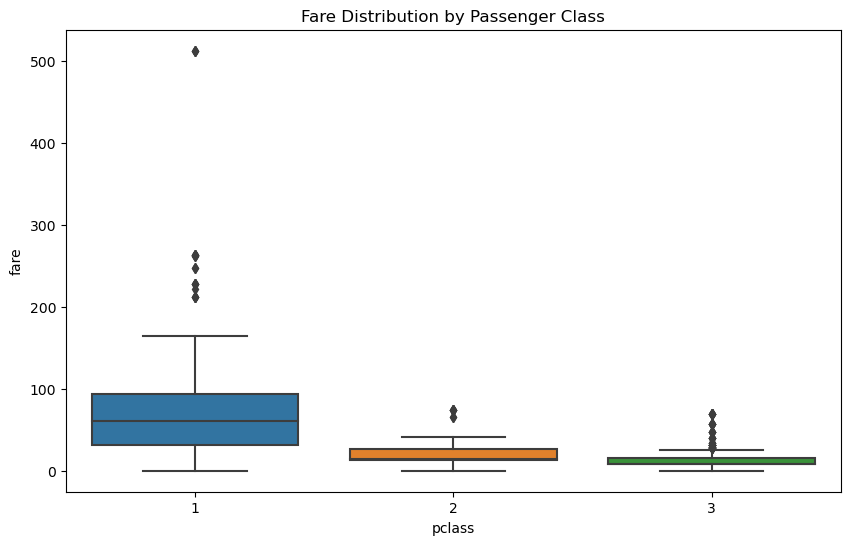

In [6]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='pclass', y='fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()

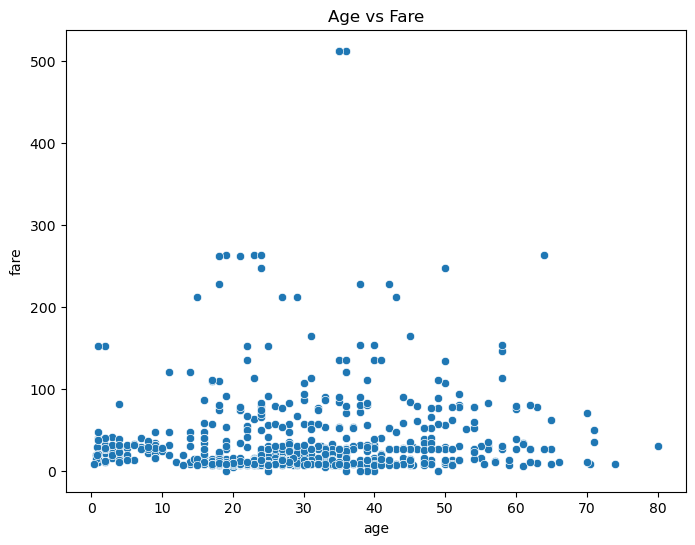

In [7]:
# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='fare')
plt.title('Age vs Fare')
plt.show()

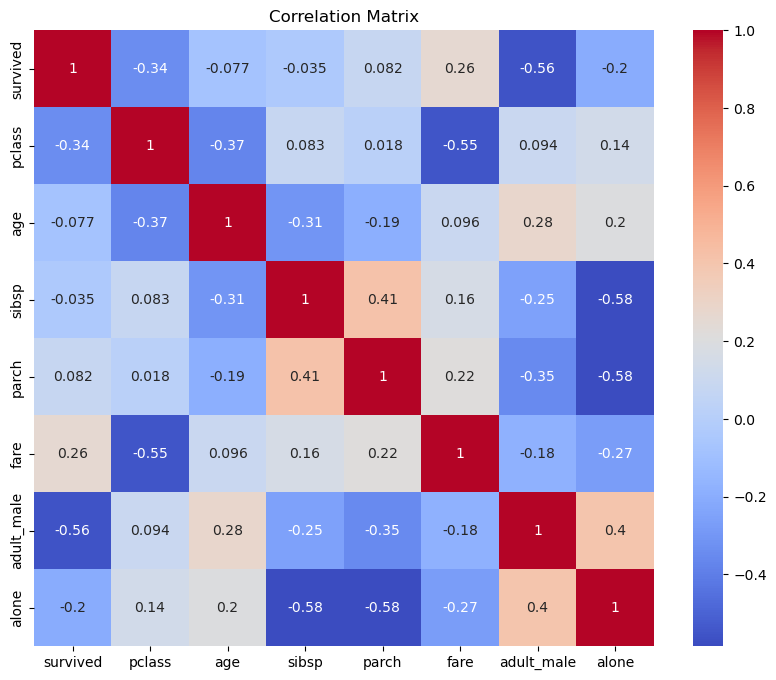

In [8]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Descriptive Statistics

In [9]:
statistics = df.describe()
print(statistics)

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


### Handle the Missing values

In [10]:
missing_values_count = df.isnull().sum()
print("Missing Values Count", missing_values_count, sep="\n")

Missing Values Count
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [11]:
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

In [12]:
mode_embarked = df['embark_town'].mode()[0]
df['embark_town'].fillna(mode_embarked, inplace=True)

In [13]:
#drop the attribute deck since 688 out of 891 values are missing
df.drop('deck', axis=1, inplace=True)

In [14]:
missing_values_count = df.isnull().sum()
print("Missing Values Count", missing_values_count, sep="\n")

Missing Values Count
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [15]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


### Find the outliers and replace them

In [16]:
def replace_outliers_zscore(data, column):
    z_scores = np.abs(stats.zscore(data[column]))
    threshold = 3  

    median_value = np.median(data[column])
    data[column] = np.where(z_scores > threshold, median_value, data[column])

In [17]:
replace_outliers_zscore(df, 'age')

In [18]:
replace_outliers_zscore(df, 'fare')

### Check for Categorical columns and perform encoding.

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['sex', 'embarked', 'class', 'who', 'embark_town', 'alive'], dtype='object')


In [20]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [21]:
print(df_encoded.head())

   survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
0         0       3  22.0      1      0   7.2500        True  False   
1         1       1  38.0      1      0  71.2833       False  False   
2         1       3  26.0      0      0   7.9250       False   True   
3         1       1  35.0      1      0  53.1000       False  False   
4         0       3  35.0      0      0   8.0500        True   True   

   sex_female  sex_male  ...  class_Second  class_Third  who_child  who_man  \
0           0         1  ...             0            1          0        1   
1           1         0  ...             0            0          0        0   
2           1         0  ...             0            1          0        0   
3           1         0  ...             0            0          0        0   
4           0         1  ...             0            1          0        1   

   who_woman  embark_town_Cherbourg  embark_town_Queenstown  \
0          0                      0

### Split the data into dependent and independent variables.

In [22]:
X = df_encoded.drop('survived', axis=1) # independant variables
y = df_encoded['survived'] # dependant variable

In [23]:
print("Independent Variables (Features):")
print(X.head())

Independent Variables (Features):
   pclass   age  sibsp  parch     fare  adult_male  alone  sex_female  \
0       3  22.0      1      0   7.2500        True  False           0   
1       1  38.0      1      0  71.2833       False  False           1   
2       3  26.0      0      0   7.9250       False   True           1   
3       1  35.0      1      0  53.1000       False  False           1   
4       3  35.0      0      0   8.0500        True   True           0   

   sex_male  embarked_C  ...  class_Second  class_Third  who_child  who_man  \
0         1           0  ...             0            1          0        1   
1         0           1  ...             0            0          0        0   
2         0           0  ...             0            1          0        0   
3         0           0  ...             0            0          0        0   
4         1           0  ...             0            1          0        1   

   who_woman  embark_town_Cherbourg  embark_town_Que

In [24]:
print("Dependent Variable (Target):")
print(y.head())

Dependent Variable (Target):
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [25]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

     pclass       age     sibsp     parch      fare  adult_male     alone  \
0  0.827377 -0.592704  0.432793 -0.473674 -0.654170    0.811922 -1.231645   
1 -1.566107  0.695087  0.432793 -0.473674  1.549441   -1.231645 -1.231645   
2  0.827377 -0.270757 -0.474545 -0.473674 -0.630941   -1.231645  0.811922   
3 -1.566107  0.453626  0.432793 -0.473674  0.923690   -1.231645 -1.231645   
4  0.827377  0.453626 -0.474545 -0.473674 -0.626639    0.811922  0.811922   

   sex_female  sex_male  embarked_C  ...  class_Second  class_Third  \
0   -0.737695  0.737695   -0.482043  ...     -0.510152     0.902587   
1    1.355574 -1.355574    2.074505  ...     -0.510152    -1.107926   
2    1.355574 -1.355574   -0.482043  ...     -0.510152     0.902587   
3    1.355574 -1.355574   -0.482043  ...     -0.510152    -1.107926   
4   -0.737695  0.737695   -0.482043  ...     -0.510152     0.902587   

   who_child   who_man  who_woman  embark_town_Cherbourg  \
0  -0.320504  0.811922  -0.661133              -0.

### Split the data into training and testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)